# Support Vector Machines

## Linear SVM Classification
In a nutshell, SVM classification consists in fitting the widest possible street between classes. The decision boundary, a straight line, will be placed just in the middle, as far as possible from the data points. This is also called *large margin classification*.

SVM is good for classification on small to medium datasets as well as for detecting outliers.

In [35]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris['data'][:, (2, 3)] # petal lenght, petal width
y = iris['target']

# true for setosa or versicolor
# basically omit virginica
setosa_or_versicolor = (y == 0) | (y== 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel='linear', C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

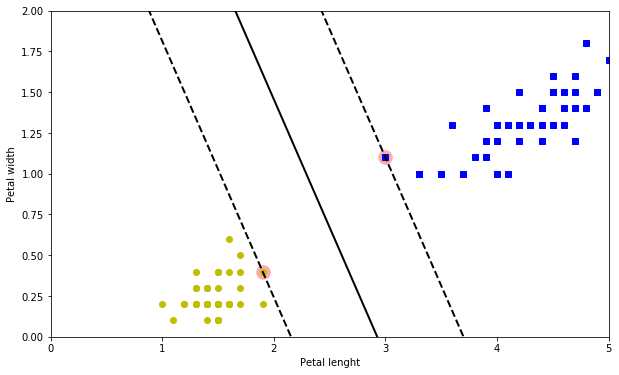

In [40]:
import matplotlib.pyplot as plt


def plot_svm_decision_boundary(svm_clf, xmin, xmax):
    # get model coefficients and intercept
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # At decision boundary: w0*x0 + w1*x1 + b = 0
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)

plt.figure(figsize=(10, 6))
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris-Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris-Versicolour')
#plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris-Virginica')
plot_svm_decision_boundary(svm_clf, 0.0, 5.5)
plt.xlabel('Petal lenght')
plt.ylabel('Petal width')
plt.axis([0.0, 5.0, 0.0, 2.0])
plt.show()

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  